<a href="https://colab.research.google.com/github/SeanC0112/5.2-Facial-Recognition/blob/main/Sean_5_2_Facial_Recognition_STARTER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **5.2 Facial Recognition labelling using machine learning**

**Source:** https://karmatnspyphuntsho-tijtech.medium.com/face-classification-by-python-using-cnn-in-google-colab-deed1b43e0fd

Edited by Anthony Pound and Alan Steremberg (March 2021)


Your task is to train a model using **new categories**.

Firstly, you will need to create a new version of this facial recognition dataset, split by your categories.

https://drive.google.com/drive/folders/1W_c9MoP_9Ft-fI12ItZvCx_746MX-1em?usp=share_link





### **Goals**

3.3 - Know how to perform data clean up

4.5 - Know how to prevent overfitting

4.6 - Know how to interpret loss data and improve the performance of a model

5.1 - Understand the ethical issues in machine learning

**I couldnt figure out how to import from google with gdown cause i don't think thats allowed with my school email so i made a folder with the necesary things which you might have to download for yourself** https://drive.google.com/drive/folders/1_5r4eCaPPs_3scXohZ3bGyM6XonY3Zzq
I also tried dropbox but that wasnt allowed with school email either
samples is the important things

### **Step 1 -** **Import libraries**


In [ ]:
# put your step 1 code here - completed for you
import os
import zipfile
import random
import tensorflow as tf
print(tf.test.gpu_device_name())

import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D

/device:GPU:0


### **Step 2 - Download and extract the amended facial recognition images folder**

You should create a subset of the original data using categories of your choice e.g. gender, age, ethincity.


In [ ]:
# put your step 2 code here - example below
#
# original dataset split into emotion folders - example only
# you will need to create a new dataset for a different category - e.g. gender

!wget -nc --no-check-certificate \
"https://www.dropbox.com/s/pp317ir7d14kc1m/ferdataset.zip?dl=1" -O "ferdataset.zip"

# you can also use gdown to bring in the dataset
# https://drive.google.com/file/d/1WJAXUjFNKDCamcF8ZzIDVXD5foIy_Y3N/view?usp=drive_link
# !gdown 1WJAXUjFNKDCamcF8ZzIDVXD5foIy_Y3N

local_zip = 'ferdataset.zip'
zip_ref  = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('Fer2013')
zip_ref.close()

--2024-11-14 06:16:24--  https://www.dropbox.com/s/pp317ir7d14kc1m/ferdataset.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6030:18::a27d:5012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/ne9p8qyk5o1vbiodquw3n/ferdataset.zip?rlkey=k5h6wwbj9rpw4acaq7ewfm5mk&dl=1 [following]
--2024-11-14 06:16:24--  https://www.dropbox.com/scl/fi/ne9p8qyk5o1vbiodquw3n/ferdataset.zip?rlkey=k5h6wwbj9rpw4acaq7ewfm5mk&dl=1
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3f30aebb19772418752e3646ba.dl.dropboxusercontent.com/cd/0/inline/CeXToxYL6Sysu_YahupVTgJwydKgjEZjKC3K5pVY9XCQO_MjkC4V2c3XB3IgYmeqiUUzYEQP60xVkMLQMdgVJjBC22koUkPoeTM2deYg1JIj_wK81u6ZK7hSxV9U_wUvFkc/file?dl=1# [following]
--2024-11-14 06:16:25--  https://uc3f30aebb19772418752e3646ba.dl.dropboxusercontent.com/cd/0/

### **Step 3 - Create the training and validation set from the image directories**


In [ ]:
# put your step 3 code here

# for 7 different expressions
# you will need to change this depending on how many classes you have
num_classes = 2

# setting the dimensions of images
img_rows, img_cols = 48, 48

# setting batch size to 32 since it will train 32 images at a time
batch_size = 32

# location of train directory and validation directorys
train_data_dir = r'/content/drive/MyDrive/ferdata/Samples'
validation_data_dir = r'/content/Fer2013/test'

# block of train data generation which generates many images from a single image which will help in training machine and improve their accuracy
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=30,
                    shear_range=0.3,
                    zoom_range=0.3,
                    width_shift_range=0.4,
                    height_shift_range=0.4,
                    horizontal_flip=True,
                    fill_mode='nearest',
                    validation_split = 0.2)

#this block of codes will refer to the root directory of our files directory for train directory, color grayscale for the machine to reading the emotion classification,
#target size is same for the dimensions of image given above, the categorical means the images are categorized into 7 categories
# and the images will be shuffled before training those images.
train_generator = train_datagen.flow_from_directory(
                    train_data_dir,
                    color_mode='grayscale',
                    target_size=(img_rows, img_cols),
                    batch_size=batch_size,
                    class_mode='binary',
                    shuffle=True)

# this code will be same as for train directory but in this it will refer to the root directory of our validation directory
validation_generator = train_datagen.flow_from_directory(
                            validation_data_dir,
                            color_mode='grayscale',
                            target_size=(img_rows, img_cols),
                            batch_size=batch_size,
                            class_mode='binary',
                            shuffle=True)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/ferdata/Samples'

### **Step 4 - Show four images from the dataset**

[0. 0. 1. 0. 0. 0. 0.]


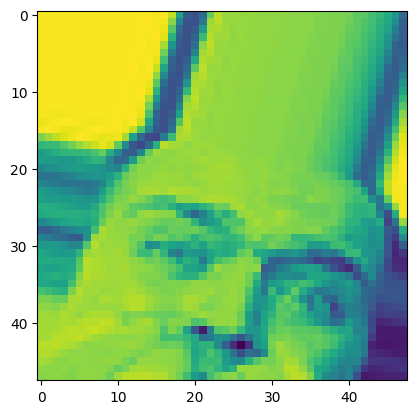

[0. 0. 0. 0. 0. 1. 0.]


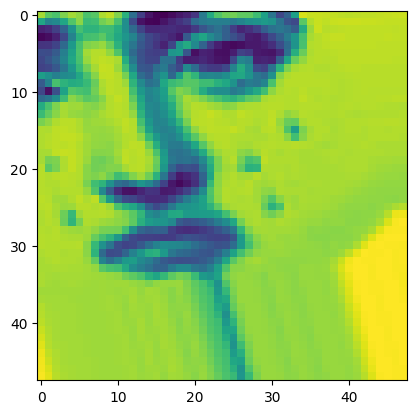

[0. 1. 0. 0. 0. 0. 0.]


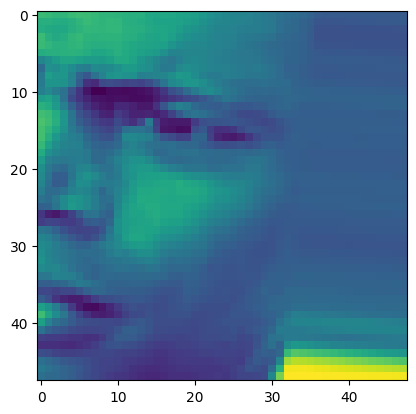

[0. 0. 0. 0. 1. 0. 0.]


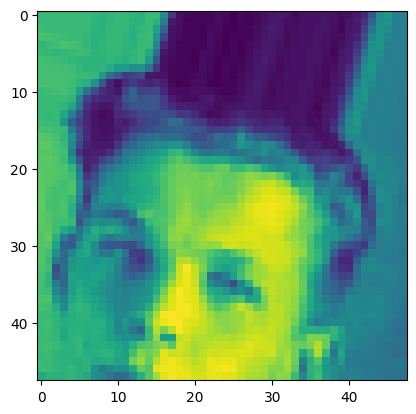

[0. 0. 0. 0. 0. 1. 0.]


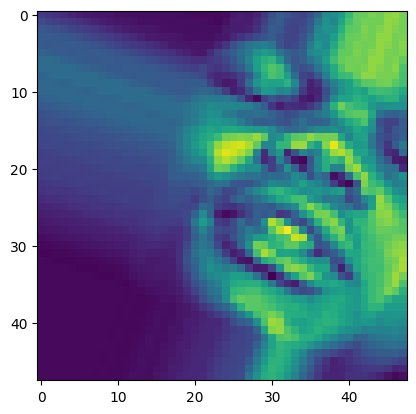

[1. 0. 0. 0. 0. 0. 0.]


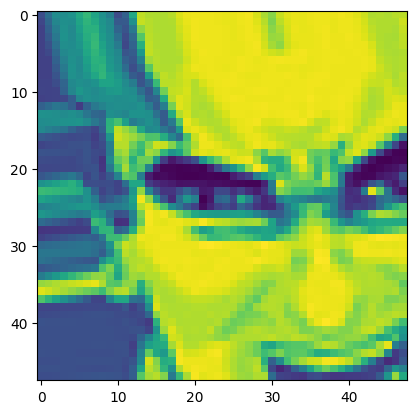

[0. 0. 0. 1. 0. 0. 0.]


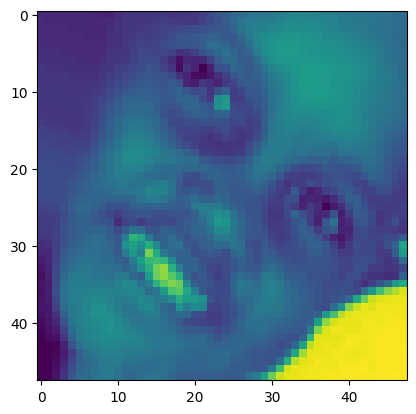

[0. 0. 0. 0. 0. 1. 0.]


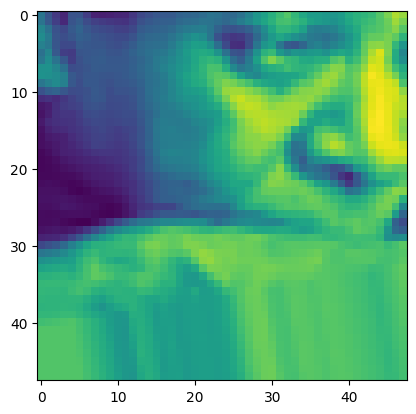

[0. 0. 0. 0. 0. 1. 0.]


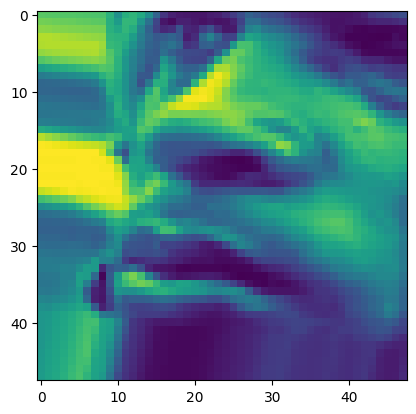

[1. 0. 0. 0. 0. 0. 0.]


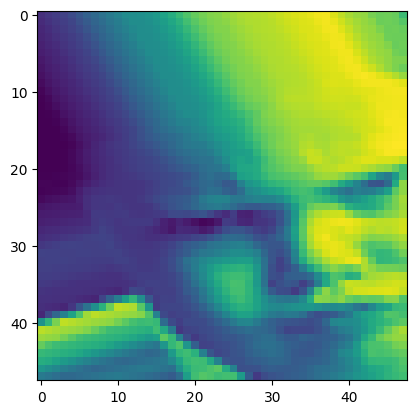

In [ ]:
# put your step 4 code here
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt
x_batch, y_batch = next(train_generator)
for i in range (0,10):
    image = x_batch[i]
    print(y_batch[i])
    plt.imshow(image)
    plt.show()






In [2]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

### **Step 5 - Define a model and print model summary**



In [ ]:
# put your step 5 code here










### **Step 6 - Train model**


In [ ]:
# put your step 6 code here
#









### **Step 7 - Plot learning curves so we can analyze loss and accuracy**


In [ ]:
# put your step 7 code here





### **Step 8 - Show the accuracy of our version of the model**

In [ ]:
# put your step 8 code here





### **Step 9 - Summarize the performance of our model**

In [ ]:
# put your step 9 code here





### **Step 10 - Check if your model categorizes correctly by uploading four test images and showing results**


In [ ]:
# Put your step 10 code here








